In [2]:
#DL_LAB_ASSIGNMENT_3

In [4]:
# 1. Loading and preprocessing the image data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

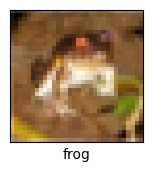

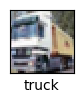

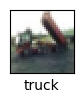

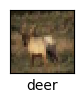

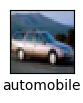

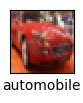

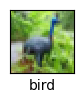

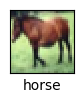

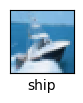

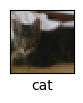

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [8]:
# 2. Defining the Model’s Architecture
model = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.Flatten(),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10)
                           ])
model.summary()

C:\Users\PARTH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 3. Training the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 75ms/step - accuracy: 0.4409 - loss: 1.5359 - val_accuracy: 0.5315 - val_loss: 1.3015
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.5901 - loss: 1.1639 - val_accuracy: 0.6213 - val_loss: 1.0836
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.6414 - loss: 1.0270 - val_accuracy: 0.6354 - val_loss: 1.0389
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 45ms/step - accuracy: 0.6779 - loss: 0.9239 - val_accuracy: 0.6752 - val_loss: 0.9303
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7017 - loss: 0.8565 - val_accuracy: 0.6834 - val_loss: 0.9237
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 46ms/step - accuracy: 0.7191 - loss: 0.7996 - val_accuracy: 0.6958 - val_loss: 0.8872
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7357 - loss: 0.7523 - val_accuracy: 0.6873 - val_loss: 0.9169
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.752

In [10]:
# 4. Estimating the Model’s Performance
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 9s - 27ms/step - accuracy: 0.7082 - loss: 0.8905


In [11]:
print(f'\nTest accuracy: {test_acc}')


Test accuracy: 0.7081999778747559
